In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Charger et prétraiter les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliser les données entre 0 et 1
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # Encodage one-hot

# Construire un réseau de neurones simple
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Couche d'entrée
    Dense(128, activation='relu'),  # Couche cachée
    Dense(10, activation='softmax')  # Couche de sortie pour la classification
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur les données de test : {test_accuracy * 100:.2f}%")


c:\Users\l\myenvv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8680 - loss: 0.4711 - val_accuracy: 0.9560 - val_loss: 0.1522
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9613 - loss: 0.1308 - val_accuracy: 0.9645 - val_loss: 0.1188
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9737 - loss: 0.0874 - val_accuracy: 0.9728 - val_loss: 0.0946
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9804 - loss: 0.0660 - val_accuracy: 0.9731 - val_loss: 0.0885
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0461 - val_accuracy: 0.9713 - val_loss: 0.0978
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9654 - loss: 0.1121
Précision sur les données de test : 97.00%


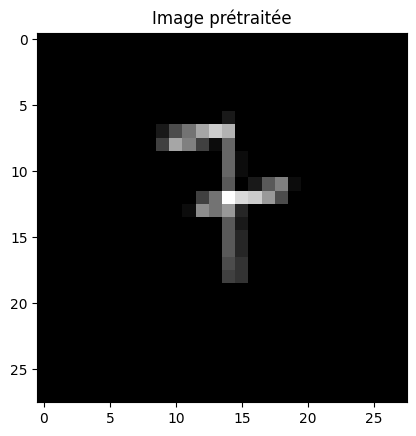

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Le modèle prédit : 5


In [3]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Charger et prétraiter l'image
image_path = r'C:\Users\l\Desktop\ML & AI\Y Elyazidi -- M355\test.png'
image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
image = ImageOps.invert(image)  # Inverser les couleurs si nécessaire
image = image.resize((28, 28))  # Redimensionner à 28x28
image = np.array(image) / 255.0  # Normaliser entre 0 et 1

# Redimensionner pour correspondre à l'entrée du modèle
image = image.reshape(1, 28, 28)

# Afficher l'image pour vérifier
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Image prétraitée")
plt.show()

# Prédire avec le modèle
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print(f"Le modèle prédit : {predicted_class}")
